In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mplsoccer import Pitch
from matplotlib.colors import to_rgba
from mplsoccer import VerticalPitch, add_image, FontManager, Sbopen

In [3]:
# liverpool data
liverpool_players = pd.read_csv('data/liverpool_players.csv')
liverpool_passes = pd.read_csv('data/liverpool_passes.csv')
metrics = pd.read_csv('data/all_data_liverpool.csv')

liverpool_passes = pd.merge(liverpool_passes, liverpool_players, left_on='Source', right_on='id')
liverpool_passes = pd.merge(liverpool_passes, liverpool_players, left_on='Target', right_on='id')
liverpool_players = pd.merge(liverpool_players, metrics, left_on='id', right_on='Id')

In [4]:
tottenham_players = pd.read_csv('data/tottenham_players.csv')
tottenham_passes = pd.read_csv('data/tottenham_passes.csv')
metrics = pd.read_csv('data/all_data_totenham.csv')

tottenham_passes = pd.merge(tottenham_passes, tottenham_players, left_on='Source', right_on='id')
tottenham_passes = pd.merge(tottenham_passes, tottenham_players, left_on='Target', right_on='id')
tottenham_players = pd.merge(tottenham_players, metrics, left_on='id', right_on='Id')

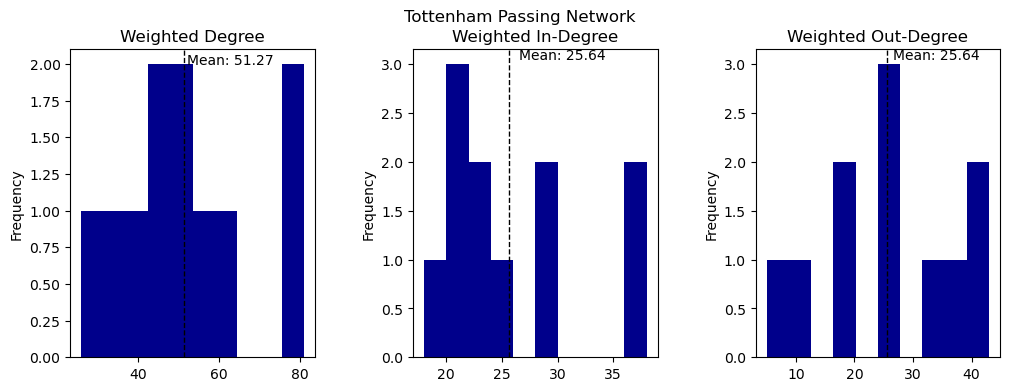

In [5]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))
fig.subplots_adjust(wspace=0.4)


# create histograms
tottenham_players['Weighted Degree'].plot.hist(ax=ax1, color='darkblue')
tottenham_players['weighted indegree'].plot.hist(ax=ax2, color='darkblue')
tottenham_players['weighted outdegree'].plot.hist(ax=ax3, color='darkblue')

# first line
ax1.axvline(tottenham_players['Weighted Degree'].mean(), color='black', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = ax1.get_ylim()
ax1.text(tottenham_players['Weighted Degree'].mean() + 0.9,  max_ylim - 0.1, 'Mean: {:.2f}'.format(tottenham_players['Weighted Degree'].mean()))


# second line
ax2.axvline(tottenham_players['weighted indegree'].mean(), color='black', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = ax2.get_ylim()
ax2.text(tottenham_players['weighted indegree'].mean() + 0.9,  max_ylim - 0.1, 'Mean: {:.2f}'.format(tottenham_players['weighted indegree'].mean()))

# third line
ax3.axvline(tottenham_players['weighted outdegree'].mean(), color='black', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = ax3.get_ylim()
ax3.text(tottenham_players['weighted outdegree'].mean() + 0.9,  max_ylim - 0.1, 'Mean: {:.2f}'.format(tottenham_players['weighted outdegree'].mean()))



# set titles for each subplot
ax1.set_title('Weighted Degree')
ax2.set_title('Weighted In-Degree')
ax3.set_title('Weighted Out-Degree')

plt.suptitle("Tottenham Passing Network")


# show the plot
plt.savefig('Tottenham_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

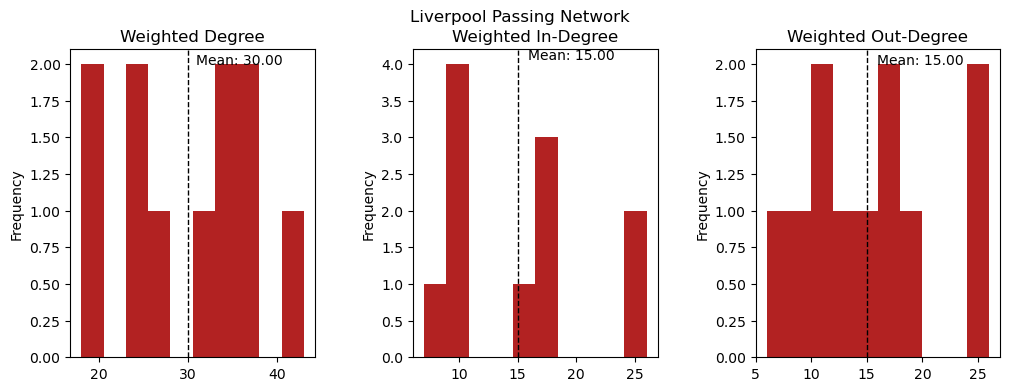

In [6]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))
fig.subplots_adjust(wspace=0.4)


# create histograms
liverpool_players['Weighted Degree'].plot.hist(ax=ax1, color='firebrick')
liverpool_players['weighted indegree'].plot.hist(ax=ax2, color='firebrick')
liverpool_players['weighted outdegree'].plot.hist(ax=ax3, color='firebrick')

# set titles for each subplot
ax1.set_title('Weighted Degree')
ax2.set_title('Weighted In-Degree')
ax3.set_title('Weighted Out-Degree')


# first line
ax1.axvline(liverpool_players['Weighted Degree'].mean(), color='black', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = ax1.get_ylim()
ax1.text(liverpool_players['Weighted Degree'].mean() + 0.9,  max_ylim - 0.1, 'Mean: {:.2f}'.format(liverpool_players['Weighted Degree'].mean()))


# second line
ax2.axvline(liverpool_players['weighted indegree'].mean(), color='black', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = ax2.get_ylim()
ax2.text(liverpool_players['weighted indegree'].mean() + 0.9,  max_ylim - 0.13, 'Mean: {:.2f}'.format(liverpool_players['weighted indegree'].mean()))

# third line
ax3.axvline(liverpool_players['weighted outdegree'].mean(), color='black', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = ax3.get_ylim()
ax3.text(liverpool_players['weighted outdegree'].mean() + 0.9,  max_ylim - 0.1, 'Mean: {:.2f}'.format(liverpool_players['weighted outdegree'].mean()))



plt.suptitle("Liverpool Passing Network")


# show the plot
plt.savefig('Liverpool_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

In [15]:
tottenham_players['weighted indegree'].describe()

count    11.000000
mean     25.636364
std       6.667424
min      18.000000
25%      21.000000
50%      23.000000
75%      28.500000
max      38.000000
Name: weighted indegree, dtype: float64

In [16]:
print(liverpool_players['weighted indegree'].mean())
print(liverpool_players['weighted outdegree'].mean())

15.0
15.0


In [17]:
liverpool_players['Weighted Degree'].describe()

count    11.00000
mean     30.00000
std       8.20975
min      18.00000
25%      24.00000
50%      32.00000
75%      36.00000
max      43.00000
Name: Weighted Degree, dtype: float64

In [13]:
# create the degree disrtibutions

metric = 'pageranks'
tottenham_players.nlargest(7, metric).loc[:,['label', metric]]

,label,pageranks
7,Alli,0.128544
5,Vertonghen,0.111339
4,Eriksen,0.110566
2,Alderweireld,0.107326
6,Winks,0.099875
10,Son,0.098905
3,Kane,0.079081


In [14]:
liverpool_players.nlargest(6, metric).loc[:,['label', metric]]

,label,pageranks
8,Salah,0.160289
5,Mané,0.154760
10,Firmino,0.125180
6,Robertson,0.116859
0,Henderson,0.104912
7,Alexander-Arnold,0.077428


In [35]:
# liverpool_players['diff'] = liverpool_players['weighted indegree'] - liverpool_players['weighted outdegree']
# liverpool_players.loc[:,['label', 'weighted indegree', 'weighted outdegree', 'diff']]